In [1]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # Plots
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [2]:
# Datensatz aus Bibliothek laden (Standarddatensatz)

iris = datasets.load_iris()
type(iris)

X = iris.data # Input Variablen
y = iris.target # Output Variable
df_iris = pd.DataFrame(X, columns = iris.feature_names) # Dataframe konstruieren
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [5]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


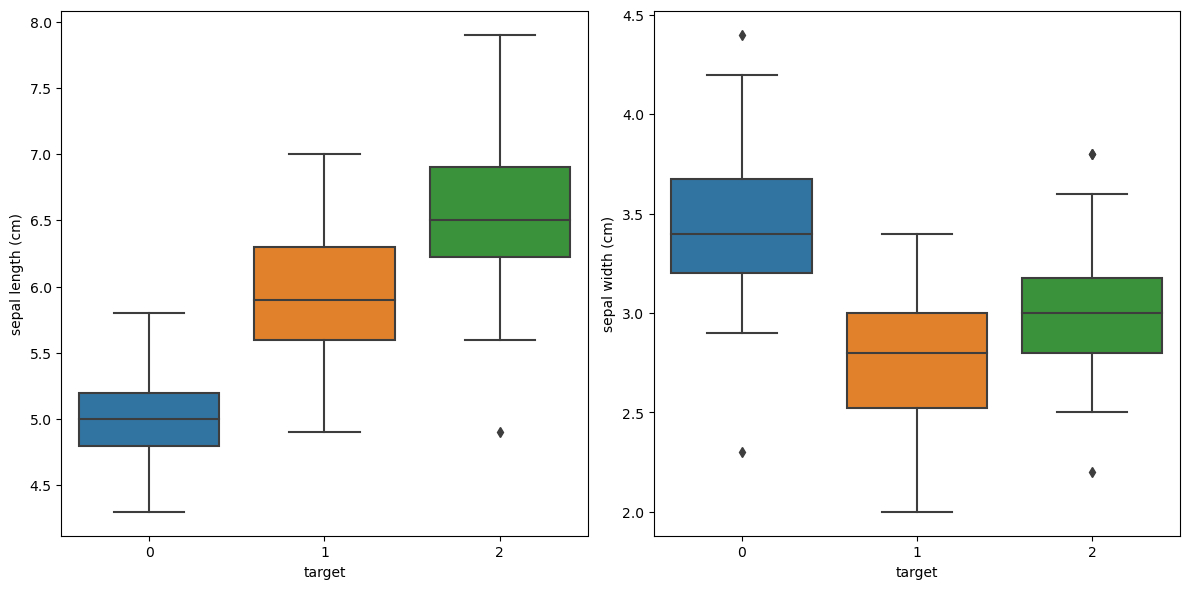

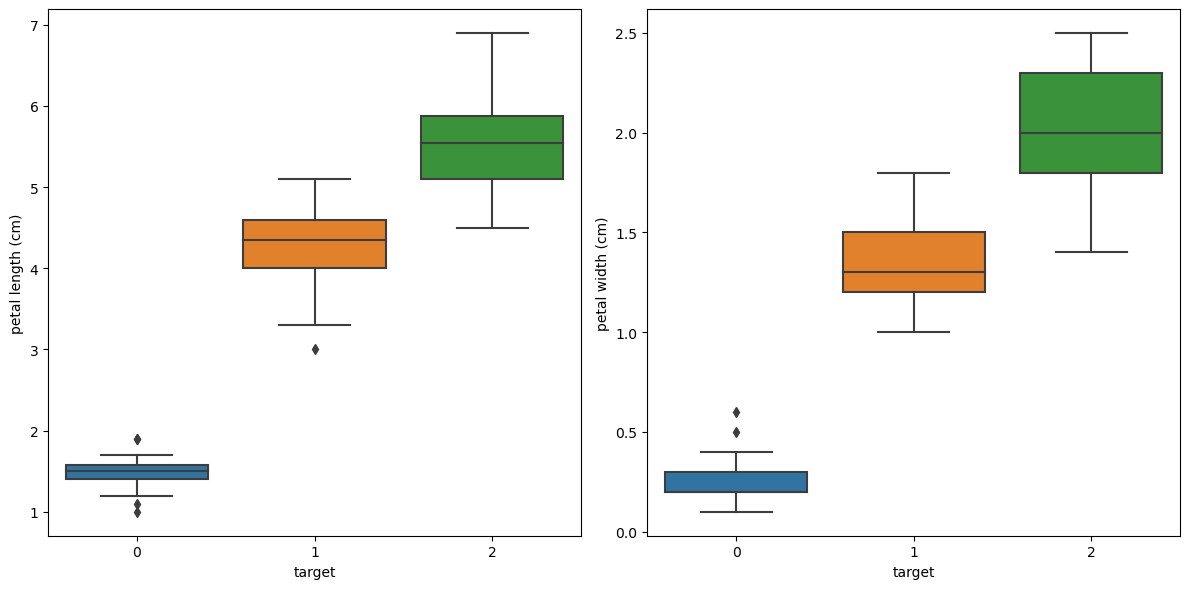

In [6]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="sepal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="sepal width (cm)", data=df_iris)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="target", y="petal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="target", y="petal width (cm)", data=df_iris)
plt.tight_layout()

In [7]:
# Trainings- und Testdatensplit
# test_size gibt an welcher Anteil für die Testdaten verwendet wird
# random_state ist ein 'seed' - Ankerpunkt für den zufälligen split,
# so erhält man in jedem Durchlauf die selbe Verteilung der Daten 
# Einfachster Split bspw 70% Trainings- und 30% Testdaten
X = df_iris.drop("target",axis=1)
y = df_iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [13]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [8]:
# von 150 Zeilen, sind 105 im Trainingsdatensatz enthalten und 45 im Testdatensatz
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


# Decision Tree I
clf = tree.DecisionTreeClassifier() ist ein Objekt der Klasse DecisionTreeClassifier

Die Methode fit() bekommt ein array X mit den Input Variablen des Trainingsdatensatzes und y einem Vektor der Output-Variablen des Trainingsdatensatzes um den Baum zu trainieren

In [9]:
# Modelltraining
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
# Da in der Output Variablen nicht nur zwischen 0 und 1 unterschieden wird, diese also nicht binär ist,
# handelt es sich um eine Multiclass-Klassifikation
np.unique(y_train)

array([0, 1, 2])

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

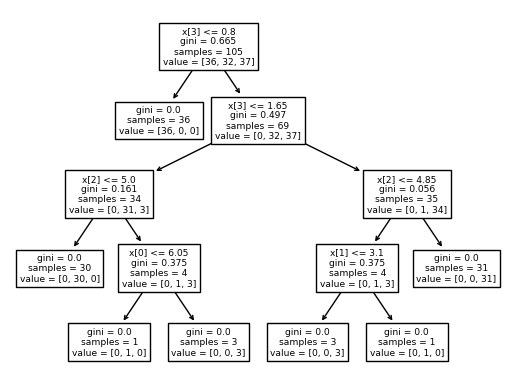

In [10]:
# Plot des trainierten Baumes
tree.plot_tree(dt)

# Resultierender Baum
x[3]<=0.8 entspricht der petal width, damit lässt sich die Klasse 0 bereits perfekt extrahieren, Gini-Index ist in diesem Blatt bereits = 0

Das 2. Kriterium ist petal width<=1.65, der Gini Index ist hier 0.497, die verbleibenden Klassen sind nahezu gleichverteilt [0, 32, 77]

In einigen der Blätter sind nur noch wenige Beobachtungen enthalten z.B. [0, 1, 0], [0, 0, 3]

Es könnte sein das das Modell hier Overfitted, dazu schauen wir und Trainings- und Testfehler an

In [11]:
X_train.head()

# x[0] ist sepal length (cm)
# x[1] ist sepal width (cm)
# x[2] ist petal length (cm)
# x[3] ist petal width (cm)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4


In [12]:
y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9555555555555556


In [13]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))

Confusion Matrix - Train: 
 [[36  0  0]
 [ 0 32  0]
 [ 0  0 37]]


# Ergebnisinterpretation
Die Genauigkeit im Trainingsdatensatz ist 1, d.h. alle Trainingsdaten können perfekt zugeordnet werden

Angewandt auf die Testdaten die im Training nicht verwendet wurden ist die Accuracy 0.956, also ebenfalls sehr hoch.

Die Confusion Matrix zeigt, dass für die Klasse 1 und 2 jeweils eine Beobachtung falsch klassifiziert wurde

In [20]:
print('Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Test: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [23]:
print('accuracy = (14+17+12)/(14+17+12+1+1)=', (14+17+12)/(14+17+12+1+1))

accuracy = (14+17+12)/(14+17+12+1+1)= 0.9555555555555556


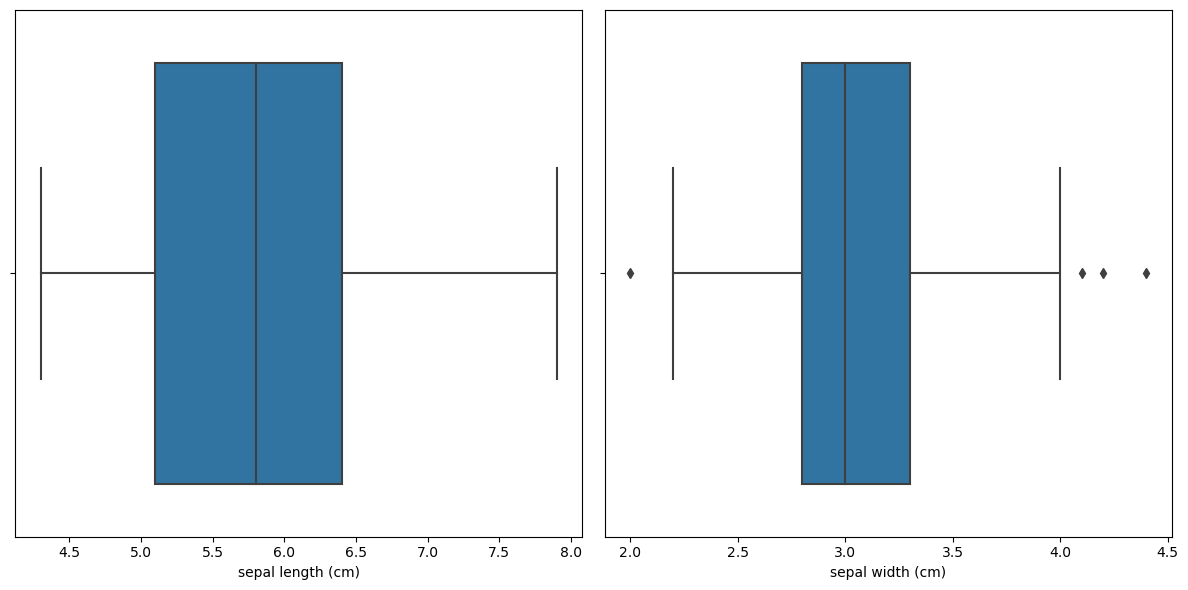

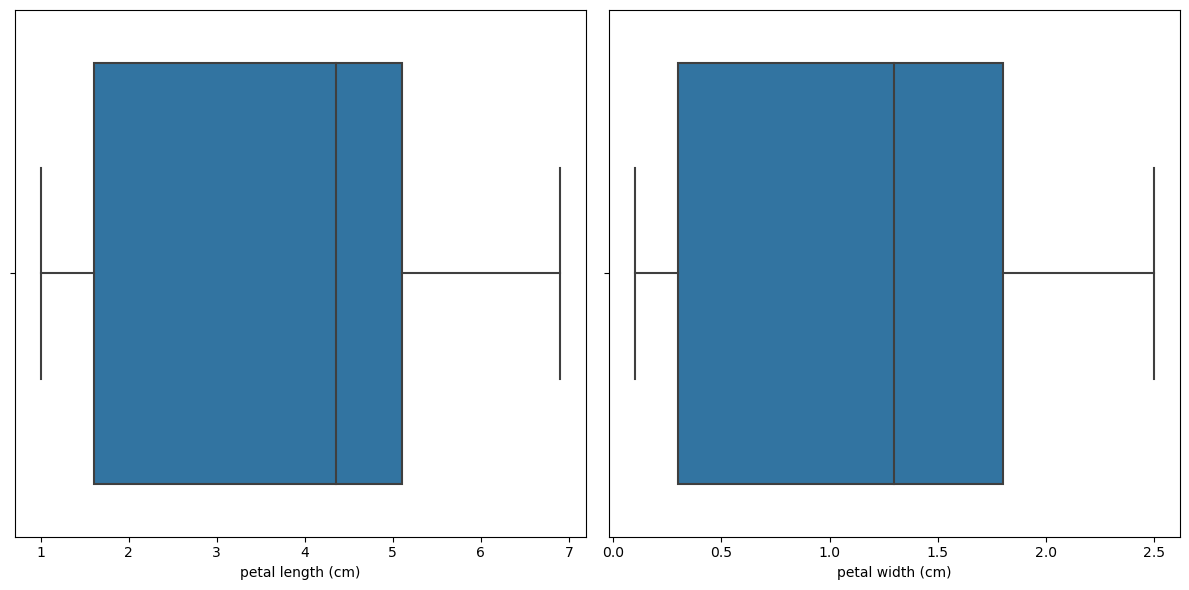

In [108]:
# Boxplots to visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="sepal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="sepal width (cm)", data=df_iris)
plt.tight_layout()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="petal length (cm)", data=df_iris)
plt.subplot(1, 2, 2)
sns.boxplot(x="petal width (cm)", data=df_iris)
plt.tight_layout()

# Outlier bei sepal witdth (cm)
Filtern nach den Quantilen

In [109]:
# Outlier anhand des 0.25 und 0.75 Quantils entfernen 'sepal width (cm)'
q1 = df_iris['sepal width (cm)'].quantile(0.05) # Quantil 1
q3 = df_iris['sepal width (cm)'].quantile(0.95) # Quantil 2
iqr = q3 - q1 # interquantilsabstand
df_iris = df_iris[(df_iris['sepal width (cm)'] >= q1) & (df_iris['sepal width (cm)'] <= q3)]
df_iris.shape # To find out the number of rows and column after outlier treatment

(136, 5)

<Axes: xlabel='sepal width (cm)'>

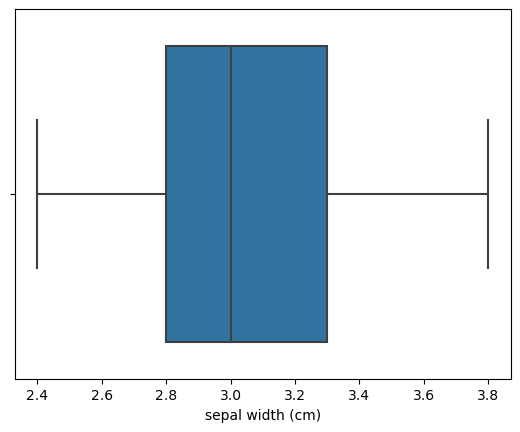

In [110]:
sns.boxplot(x="sepal width (cm)", data=df_iris)

# Decision Tree II

In [111]:
# Splitting the data into train and test sets
X = df_iris.drop("target",axis=1)
y = df_iris["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [112]:
X_train.shape

(95, 4)

In [113]:
X_test.shape

(41, 4)

In [114]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [115]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.8780487804878049


[Text(0.6, 0.8333333333333334, 'x[3] <= 1.7\ngini = 0.665\nsamples = 95\nvalue = [29, 31, 35]'),
 Text(0.4, 0.5, 'x[2] <= 2.45\ngini = 0.499\nsamples = 60\nvalue = [29, 31, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

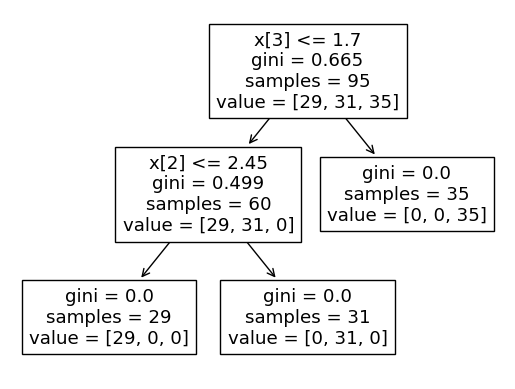

In [116]:
tree.plot_tree(dt)

In [118]:
#Classification for test before hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      0.85      0.81        13
           2       0.85      0.79      0.81        14

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



In [119]:
# Hyperparameter Tuning of DTC

dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [120]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [121]:
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[29  0  0]
 [ 0 31  0]
 [ 0  0 35]]

 Confusion Matrix - Test: 
 [[14  0  0]
 [ 0 11  2]
 [ 0  3 11]]


In [122]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      0.85      0.81        13
           2       0.85      0.79      0.81        14

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



In [123]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.8780487804878049
